# Jay Parmar

# Topic : Prediction using Decision Tree  Algorithm :

## Import required libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

from warnings import filterwarnings
filterwarnings(action='ignore')

## Iris Data Set :

In [2]:
df = pd.read_csv('Iris.csv')
df

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Exploratory Data Analysis (EDA) :

### Shape of Data :

In [3]:
df.shape

(150, 5)

In [4]:
df.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Class'], dtype='object')

### Data Information :

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  150 non-null    float64
 1   Sepal_Width   150 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Data Visualization :

### Box Plot of each feature :

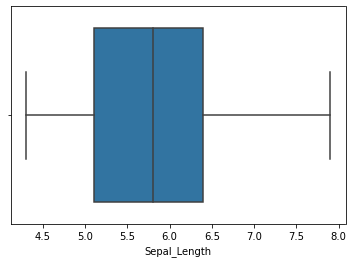

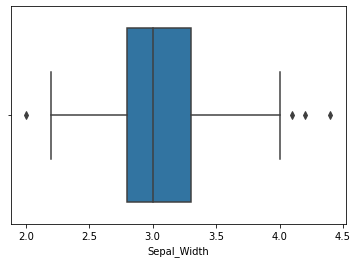

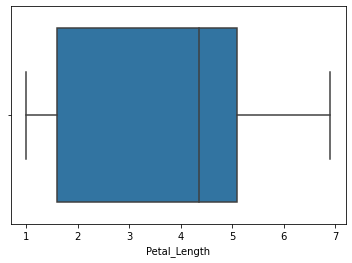

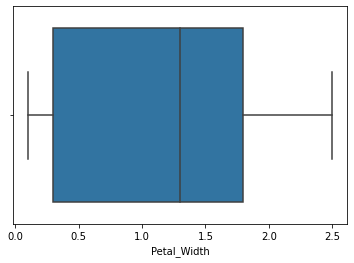

In [6]:
for cl in df.columns:
    if df[cl].dtype != 'object': 
        sns.boxplot(df[cl])
        plt.show()

### Histogram of each feature :

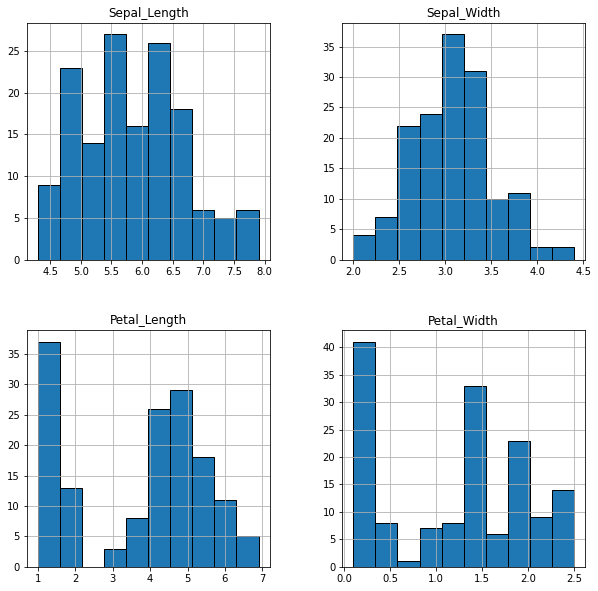

In [7]:
df.hist(edgecolor='black', figsize=(10,10))
plt.show()

### Box plot between features Vs Species :

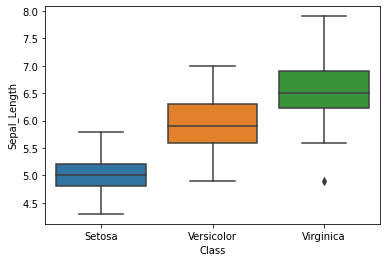

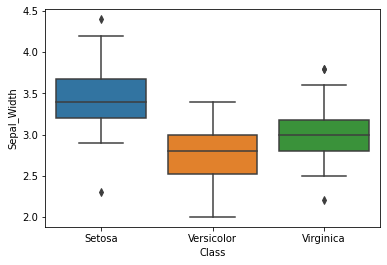

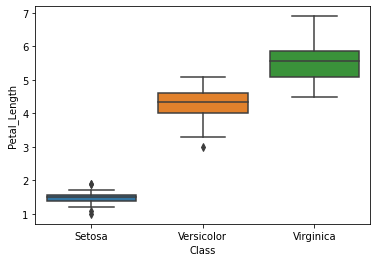

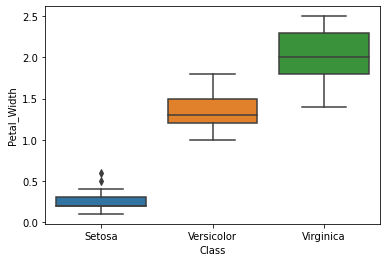

In [8]:
for col in df.columns:
    if df[col].dtypes != "object":
        sns.boxplot(df['Class'],df[col])     #Hence the features with Species has linear realtionship
        plt.show()

### Correlation function :

              Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
Sepal_Length      1.000000    -0.117570      0.871754     0.817941
Sepal_Width      -0.117570     1.000000     -0.428440    -0.366126
Petal_Length      0.871754    -0.428440      1.000000     0.962865
Petal_Width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

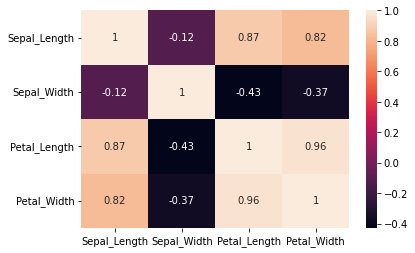

In [9]:
print(df.corr())
sns.heatmap(df.corr(), annot = True)

## Split the dataset into a training set and a testing set :

In [10]:
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 5)
(38, 5)


In [11]:
train_X = train[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
train_y = train.Class

test_X = test[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']]
test_y = test.Class

In [12]:
dtc = DecisionTreeClassifier(criterion = "entropy",random_state =0)
model = dtc.fit(train_X, train_y)
y_predict = dtc.predict(test_X)

## Visualize the Decision Tree graph :

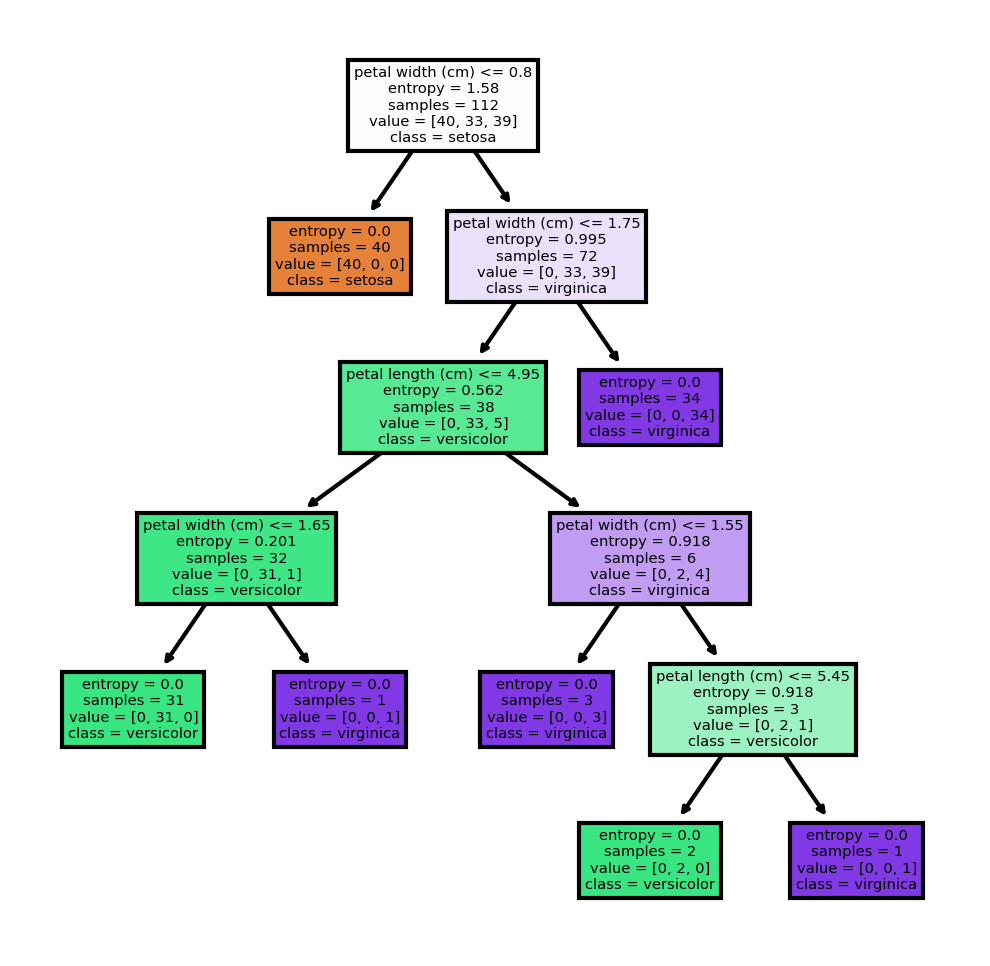

In [13]:
from sklearn import tree

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

## Model Evaluation :

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       1.00      0.94      0.97        17
   Virginica       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.98        38
weighted avg       0.98      0.97      0.97        38



<AxesSubplot:>

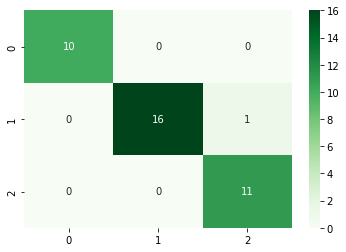

In [14]:
print(classification_report(test_y, y_predict))
sns.heatmap(confusion_matrix(test_y, y_predict),annot = True, cmap = "Greens")

In [15]:
accuracy_score(test_y, y_predict)

0.9736842105263158

## Conclusion :

* Here, we have applied decision tree algorithm on Iris dataset and the accuracy of this model is 0.9736.